In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
i = df[df['Category'] == '1.9'].index
df.loc[i]
print(i)
df = df.drop(i)

Int64Index([10472], dtype='int64')


## Let us first visualise the dataset

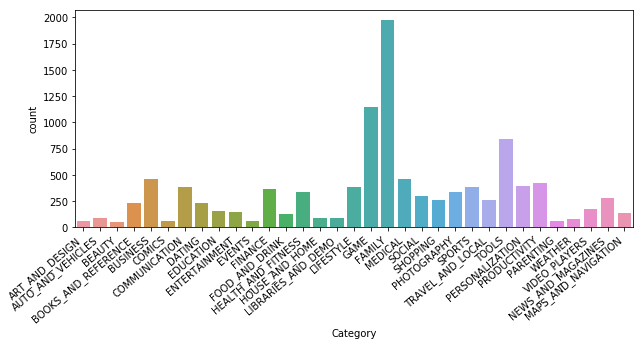

In [5]:
plt.figure(figsize = (10, 4))
ax = sns.countplot(df['Category'], orient = 'v')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

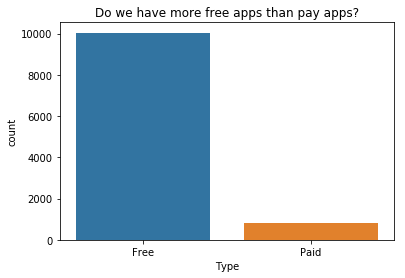

In [6]:
plt.figure()
plt.title('Do we have more free apps than pay apps?')
ax = sns.countplot(df['Type'].loc[df['Type'] != '0'])
plt.show()

In [7]:
prices = df['Price'].unique()
print("All the unique prices")
print(prices)
print()
print("No. of unique prices = "+str(prices.shape[0]))

All the unique prices
['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']

No. of unique prices = 92


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


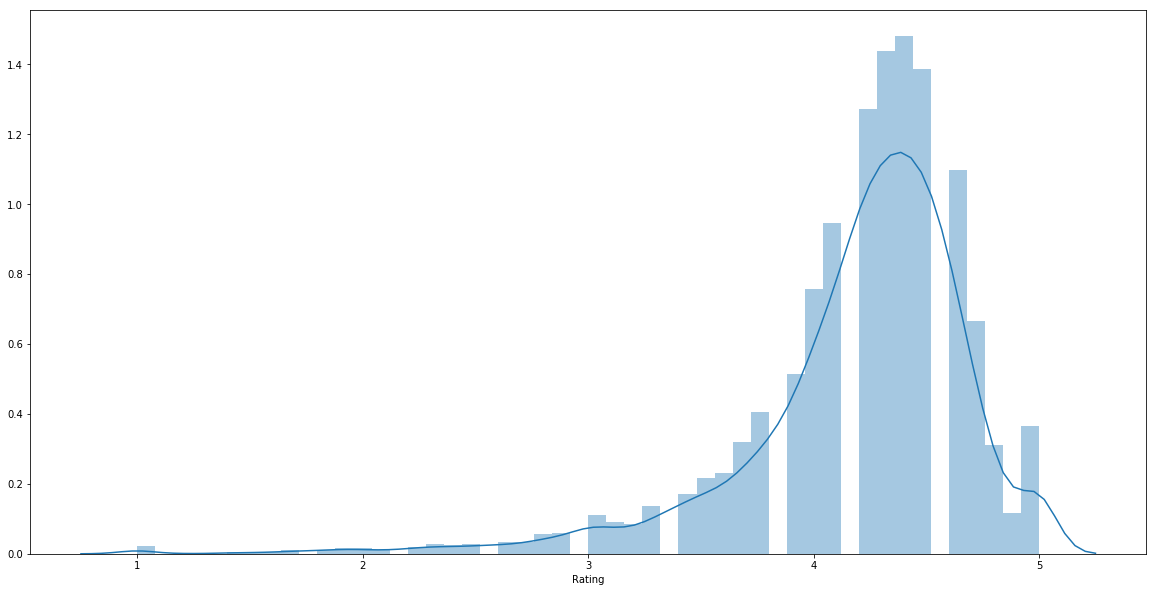

In [8]:
#raitng visualisation
plt.figure(figsize=(20,10))
sns.distplot(df['Rating'].loc[df['Rating'].notna()])
plt.show()

In [9]:
# plt.figure()
# sns.scatterplot(x = 'Rating', y = 'Reviews', data = df[:1000])
# plt.plot()

[]

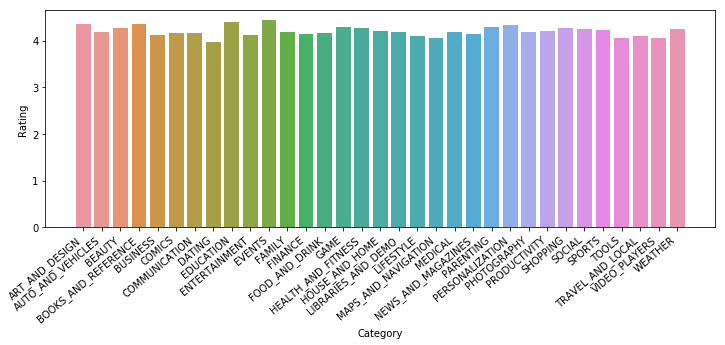

In [10]:
rating_cat = df.groupby('Category')['Rating'].mean().reset_index()
plt.figure(figsize = (12,4))
ax = sns.barplot(x = 'Category', y = 'Rating', data = rating_cat)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.plot()

In [11]:
data = df.copy(deep=True)

In [252]:
# data['Reviews'] = data['Reviews'].astype(dtype = 'int64')
# ax = sns.distplot(data['Reviews'])

[]

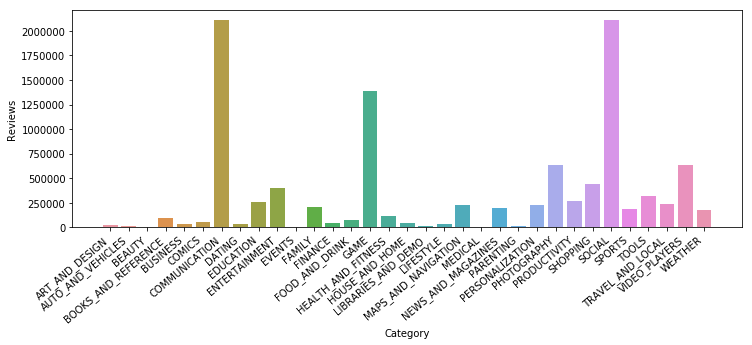

In [13]:
reviews_cat = data.groupby('Category')['Reviews'].mean().reset_index()
plt.figure(figsize = (12, 4))
ax = sns.barplot(x = 'Category', y = 'Reviews', data = reviews_cat)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.plot()

# Preprocessing and cleaning of data

In [14]:
print(df.shape)

(10840, 13)


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.5+ MB
None


In [16]:
df.dropna(inplace=True)

In [17]:
print(df.shape)

(9360, 13)


### we have removed the null value rows (in rating column)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
#unique categories
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [21]:
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i

In [22]:
#category values are now mapped to intiger numbers
category_dict

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'GAME': 17,
 'FAMILY': 18,
 'MEDICAL': 19,
 'SOCIAL': 20,
 'SHOPPING': 21,
 'PHOTOGRAPHY': 22,
 'SPORTS': 23,
 'TRAVEL_AND_LOCAL': 24,
 'TOOLS': 25,
 'PERSONALIZATION': 26,
 'PRODUCTIVITY': 27,
 'PARENTING': 28,
 'WEATHER': 29,
 'VIDEO_PLAYERS': 30,
 'NEWS_AND_MAGAZINES': 31,
 'MAPS_AND_NAVIGATION': 32}

In [23]:
#we have now added a new category column in the dataframe that has
#intiger values
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [25]:
df["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
                ...        
10795                  4.0M
10796                  7.8M
10797                   46M
10799                  6.8M
10800               

### clean the column of  size

In [26]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

In [27]:
# for i in df["Size"] :
#     i = change_size(i)
#inpleace change the size column
df["Size"] = df["Size"].map(change_size)

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              7723 non-null float64
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Category_c        9360 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.1+ MB


In [30]:
# there are some null values , hence
df.Size.fillna(method = 'ffill', inplace = True)

### Clean the install column

In [31]:
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

### Convert paid and free into binary feild

Free  = 0 ,
Paid  = 1

In [32]:
def type_category(types):
    if types == 'Free':
        return 0
    else:
        return 1
df["Type"] = df["Type"].map(type_category)

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


### Cleaning content rating column

In [34]:
RatingVals =df["Content Rating"].unique()
RatingDict ={}
for i in range(len(RatingVals)) :
    RatingDict[RatingVals[i]] = i

In [35]:
RatingDict

{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

In [36]:
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

### Cleaning genre column

Genre is a subset of category column so we can and can not include such a data while we create the model .

In [37]:
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [38]:
GenresDict

{'Art & Design': 0,
 'Art & Design;Pretend Play': 1,
 'Art & Design;Creativity': 2,
 'Auto & Vehicles': 3,
 'Beauty': 4,
 'Books & Reference': 5,
 'Business': 6,
 'Comics': 7,
 'Comics;Creativity': 8,
 'Communication': 9,
 'Dating': 10,
 'Education;Education': 11,
 'Education': 12,
 'Education;Creativity': 13,
 'Education;Music & Video': 14,
 'Education;Action & Adventure': 15,
 'Education;Pretend Play': 16,
 'Education;Brain Games': 17,
 'Entertainment': 18,
 'Entertainment;Music & Video': 19,
 'Entertainment;Brain Games': 20,
 'Entertainment;Creativity': 21,
 'Events': 22,
 'Finance': 23,
 'Food & Drink': 24,
 'Health & Fitness': 25,
 'House & Home': 26,
 'Libraries & Demo': 27,
 'Lifestyle': 28,
 'Lifestyle;Pretend Play': 29,
 'Adventure;Action & Adventure': 30,
 'Arcade': 31,
 'Casual': 32,
 'Card': 33,
 'Casual;Pretend Play': 34,
 'Action': 35,
 'Strategy': 36,
 'Puzzle': 37,
 'Sports': 38,
 'Music': 39,
 'Word': 40,
 'Racing': 41,
 'Casual;Creativity': 42,
 'Casual;Action & Adven

In [39]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c,Genres_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,1,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,2


Dropping some unnecessary columns like :
1. App name
2. Last Updated
3. Current Version
4. Android Version

In [40]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [41]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,0,Art & Design;Creativity,0,2


### Cleaning the price column

In [42]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [43]:
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price
df['Price'] = df['Price'].map(price_clean).astype(float)

In [44]:
# convert reviews to int
df['Reviews'] = df['Reviews'].astype(int)

In [45]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


## Genralisation of values

In [46]:
dfnew = df.copy(deep=True)
cols_to_norm = ['Size','Installs', 'Reviews','Price']
# dfnew[cols_to_norm] = dfnew[cols_to_norm].apply(lambda x: (1000)*((x - x.min()) / (x.max() - x.min())))

In [47]:
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())))

In [48]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,2.021538e-06,0.189931,9.999000e-06,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,1.235953e-05,0.139927,4.999990e-04,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,1.119638e-03,0.086922,4.999999e-03,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,2.759054e-03,0.249936,5.000000e-02,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,1.235953e-05,0.027917,9.999900e-05,0,0.0,0,Art & Design;Creativity,0,2
5,ART_AND_DESIGN,4.4,2.123895e-06,0.055920,4.999900e-05,0,0.0,0,Art & Design,0,0
6,ART_AND_DESIGN,3.8,2.264635e-06,0.189931,4.999900e-05,0,0.0,0,Art & Design,0,0
7,ART_AND_DESIGN,4.1,4.710184e-04,0.289940,9.999990e-04,0,0.0,0,Art & Design,0,0
8,ART_AND_DESIGN,4.4,1.764368e-04,0.329943,9.999990e-04,0,0.0,0,Art & Design,0,0
9,ART_AND_DESIGN,4.7,1.535345e-06,0.030918,9.999000e-06,0,0.0,0,Art & Design;Creativity,0,2


In [49]:
# df

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null float64
Size              9360 non-null float64
Installs          9360 non-null float64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int64
Genres            9360 non-null object
Category_c        9360 non-null int64
Genres_c          9360 non-null int64
dtypes: float64(5), int64(4), object(2)
memory usage: 877.5+ KB


In [51]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])
df2[cols_to_norm] = df2[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())))

In [52]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,0.000002,0.189931,0.00001,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,0.000012,0.139927,0.00050,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,0.001120,0.086922,0.00500,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,0.002759,0.249936,0.05000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,0.000012,0.027917,0.00010,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


### Evaluation of error function

In [53]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Root Mean Squared Error: '+ str(np.sqrt(metrics.mean_squared_error(y_true,y_predict))))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [54]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

### Making a regression model

We start off by looking at linear regression model (without the genre label)

In [55]:
from sklearn.linear_model import LinearRegression 

In [56]:
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)

In [57]:
print(X.shape)

(9360, 7)


In [58]:
X.head()

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
0,0.000002,0.189931,0.00001,0,0.0,0,0
1,0.000012,0.139927,0.00050,0,0.0,0,0
2,0.001120,0.086922,0.00500,0,0.0,0,0
3,0.002759,0.249936,0.05000,0,0.0,1,0
4,0.000012,0.027917,0.00010,0,0.0,0,0


In [59]:
y = df.Rating

In [60]:
y =y.values
print(type(y))

<class 'numpy.ndarray'>


In [61]:
X =X.values

In [62]:
print(X.shape)

(9360, 7)


In [63]:
rs=0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=rs)

In [65]:
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

In [66]:
score =model.score(X_test ,y_test)
print(score)

0.010076895319117485


In [67]:
# np.round(accuracy*100, 2)
# metrics.mean_squared_error(y_test,Results)
y_test.shape

(2808,)

In [68]:
acc=0
for ix in range(y_test.shape[0]) :
     acc = acc +( np.abs(y_test[i]-Results[i])/y_test[i])*100
acc = (acc/y_test.shape[0])
acc = 100 -acc
print(acc)

92.31073029028525


In [69]:
Evaluationmatrix(y_test, Results)

Mean Squared Error: 0.2673431154564481
Root Mean Squared Error: 0.5170523333826549
Mean absolute Error: 0.3559645506964455
Mean squared Log Error: 0.013225150564220519


In [70]:
ylintest = y_test
ylinpred = Results
acclin = acc

## Using dummy variable

In [71]:
X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1).values
y_d = df2.Rating.values

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30,random_state=rs)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

In [72]:
Evaluationmatrix(y_test_d, Results_d)

Mean Squared Error: 0.26076724192313316
Root Mean Squared Error: 0.5106537397524209
Mean absolute Error: 0.35287583397324607
Mean squared Log Error: 0.012936110730402356


In [73]:
acc=0
for ix in range(y_test.shape[0]) :
     acc = acc + 100*(np.abs(y_test_d[i]-Results_d[i])/y_test[i])
acc =(acc/y_test.shape[0])
acc = 100 - acc
print(acc)

92.36653645833323


In [74]:
Evaluationmatrix(y_test_d , Results_d)

Mean Squared Error: 0.26076724192313316
Root Mean Squared Error: 0.5106537397524209
Mean absolute Error: 0.35287583397324607
Mean squared Log Error: 0.012936110730402356


### Mean and std deviation of results

In [75]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Actual mean of population:4.191837606837606
Integer encoding(mean) :4.195308735497167
Dummy encoding(mean) :4.194508609608707
Integer encoding(std) :0.06553634840273442
Dummy encoding(std) :0.1009344241386467


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


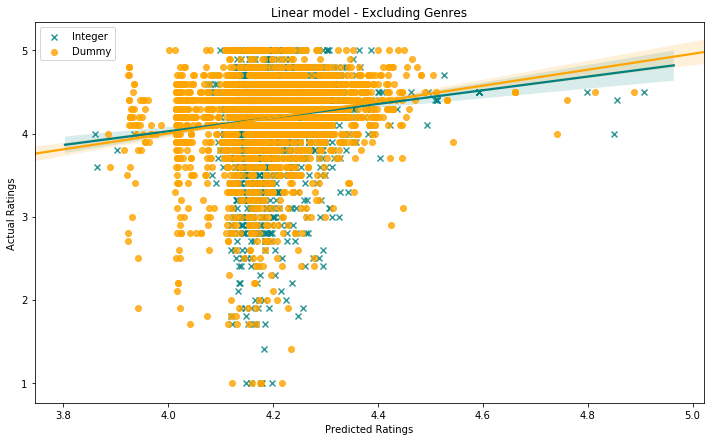

In [76]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

### Now trying with KNN model

The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset — its "nearest neighbors".

In [77]:
#the cleaned dataset that we currently have is :
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,0.000002,0.189931,0.00001,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,0.000012,0.139927,0.00050,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,0.001120,0.086922,0.00500,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,0.002759,0.249936,0.05000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,0.000012,0.027917,0.00010,0,0.0,0,Art & Design;Creativity,0,2


In [78]:
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1).values
y = df.Rating.values

In [79]:
# X.head()

In [80]:
# y.head()

In [81]:
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = rs)

In [82]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [83]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

In [84]:
model.score(X_test,y_test)

0.01525205249704209

In [85]:
y_pred =model.predict(X_test)

In [86]:
acc=0
for ix in range(y_test.shape[0]) :
     acc = acc + 100*(np.abs(y_test[i]-Results[i])/y_test[i])
acc = 100 -(acc/y_test.shape[0])
print(acc)
accknn =acc

92.31073029028525


## Example prediction

In [87]:
i =15
print("y_test[i] = ",y_test[i])
print("y_pred[i] = ",y_pred[i])

y_test[i] =  4.4
y_pred[i] =  4.333333333333333


## Errors metrics

In [88]:
Evaluationmatrix(y_test ,y_pred)

Mean Squared Error: 0.26594548907882243
Root Mean Squared Error: 0.5156990295500103
Mean absolute Error: 0.3563532763532764
Mean squared Log Error: 0.013113331778564285


In [89]:
yknntest = y_test
yknnpred = y_pred

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


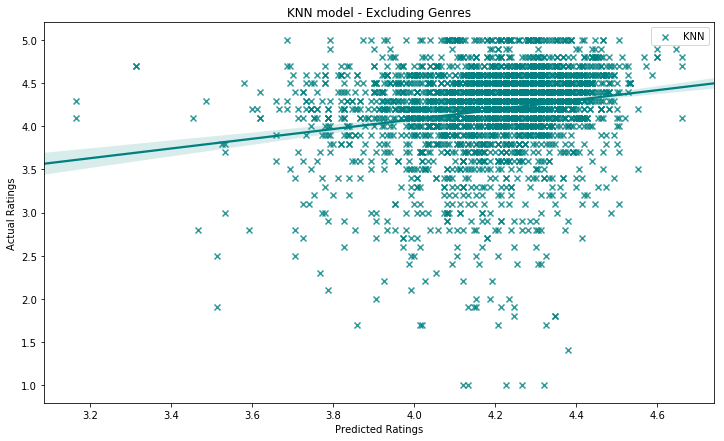

In [90]:
plt.figure(figsize=(12,7))
sns.regplot(y_pred,y_test,color='teal', label = 'KNN', marker = 'x')
plt.legend()
plt.title('KNN model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
print(y_pred.shape,y_test.shape)

(2808,) (2808,)


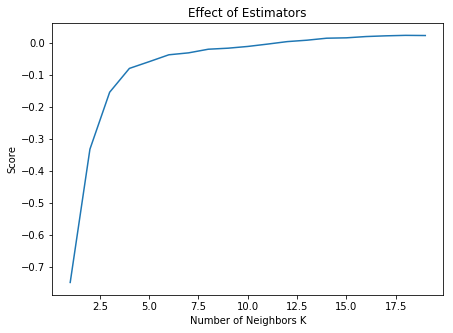

In [93]:
#Try different numbers of n_estimators 
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

## Random forest model

In [94]:
df1 = dfnew.copy(deep=True)
# cols_to_norm = ['Size','Installs', 'Reviews','Price']
# dfnew[cols_to_norm] = dfnew[cols_to_norm].apply(lambda x: (1000)*((x - x.min()) / (x.max() - x.min())))
X = df1.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1).values
y = df1.Rating.values

In [95]:
model = RandomForestRegressor(n_jobs=-1 ,n_estimators=100)

In [96]:
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = rs)

In [97]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [98]:
y_pred = model.predict(X_test)

In [99]:
model.score(X_test,y_test)

0.14517279487224777

In [100]:
i =10
print("y_test[i] = ",y_test[i])
print("y_pred[i] = ",y_pred[i])

y_test[i] =  4.1
y_pred[i] =  3.991999999999999


In [101]:
Evaluationmatrix(y_test ,y_pred)

Mean Squared Error: 0.22881318850344257
Root Mean Squared Error: 0.4783442155011834
Mean absolute Error: 0.3119321866096866
Mean squared Log Error: 0.01139770818386856


In [102]:
yrftest = y_test
yrfpred = y_pred

In [103]:
acc=0
for ix in range(y_test.shape[0]) :
     acc = acc + 100*(np.abs(y_test[i]-y_pred[i])/y_test[i])
acc=(acc/y_test.shape[0])
acc = 100-acc
accrf = acc
print(acc)

97.3658536585365


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


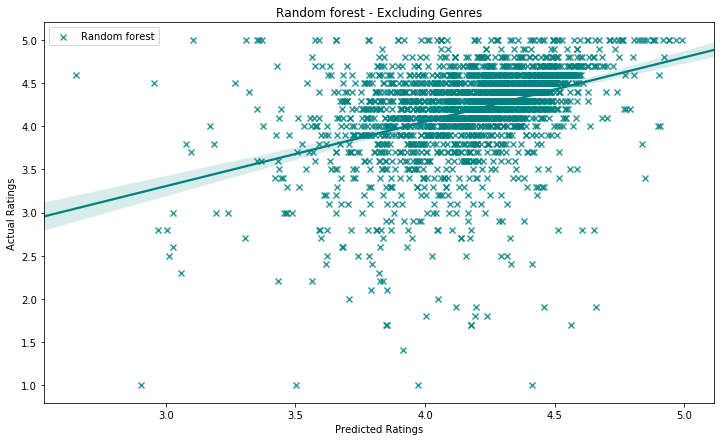

In [104]:
plt.figure(figsize=(12,7))
sns.regplot(y_pred,y_test,color='teal', label = 'Random forest', marker = 'x')
plt.legend()
plt.title('Random forest - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

[(10, 0.09444559818769926),
 (20, 0.09851663045082948),
 (30, 0.12022190266437582),
 (40, 0.1384354853688028),
 (50, 0.14493631090901304),
 (60, 0.14761528734670581),
 (70, 0.1436334603115378),
 (80, 0.13830270481917772),
 (90, 0.14279483819965444),
 (100, 0.14562275733734997),
 (110, 0.14881559481402296),
 (120, 0.14089151969824787),
 (130, 0.15230208710617055),
 (140, 0.14958102449210575),
 (150, 0.14867014431837622),
 (160, 0.13856547257057794),
 (170, 0.1451614245372792),
 (180, 0.15085271367081543),
 (190, 0.14374339387716373)]

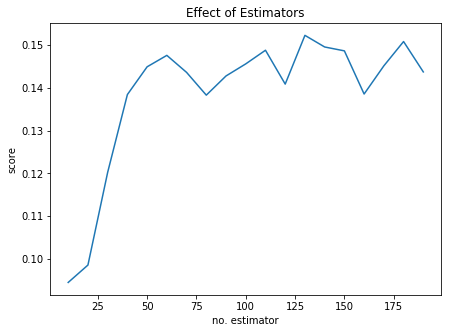

In [105]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

## Using SVM 

In [212]:
from sklearn import svm

In [213]:
df1 = dfnew.copy(deep=True)
cols_to_norm = ['Size','Installs', 'Reviews','Price']
dfnew[cols_to_norm] = dfnew[cols_to_norm].apply(lambda x: (1000)*((x - x.min()) / (x.max() - x.min())))
# print(df1)

In [214]:
X = df1.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1).values
y = df1.Rating.values

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=rs)

In [216]:
model2 = svm.SVR()
model2.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [217]:
Results2 = model2.predict(X_test)

## Error metrics

In [218]:
Evaluationmatrix(y_test,Results2)

Mean Squared Error: 0.27343760666481276
Root Mean Squared Error: 0.5229126185748559
Mean absolute Error: 0.34740232566465135
Mean squared Log Error: 0.013422970688015639


In [219]:
model2.score(X_test ,y_test)

-0.0124899010920565

In [220]:
ysvmtest = y_test
ysvmpred = Results2

In [221]:
acc=0
for ix in range(y_test.shape[0]) :
     acc = acc + 100*(np.abs(y_test[i]-Results2[i])/y_test[i])
acc =(acc/y_test.shape[0])
acc = 100-acc
accsvm = acc
print(acc)

97.73861214246904


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


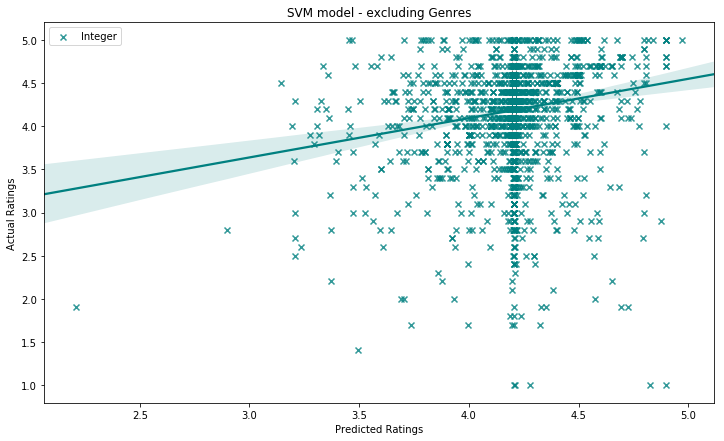

In [222]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='teal', label = 'Integer', marker = 'x')
plt.legend()
plt.title('SVM model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

## Using Neural Networks 

In [223]:
import torch
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data

In [224]:
torch.manual_seed(1) 

In [225]:
df1 = dfnew.copy(deep=True)
cols_to_norm = ['Size','Installs', 'Reviews','Price']
dfnew[cols_to_norm] = dfnew[cols_to_norm].apply(lambda x: (100000)*((x - x.min()) / (x.max() - x.min())))

In [226]:
X = df1.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1).values
y = df2.Rating.values

In [227]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [228]:
print(X)
# pytorch.set_default_tensor_type('torch.DoubleTensor')

[[2.02153821e-03 1.89931144e+02 9.99900001e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23595311e-02 1.39926894e+02 4.99999000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.11963789e+00 8.69223884e+01 4.99999900e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.83836369e-05 3.59180530e+01 9.90000001e-05 ... 0.00000000e+00
  0.00000000e+00 1.80000000e+01]
 [1.44578366e-03 3.59180530e+01 9.99000001e-04 ... 0.00000000e+00
  3.00000000e+00 3.00000000e+00]
 [5.09614429e+00 1.89931144e+02 9.99999901e+00 ... 0.00000000e+00
  0.00000000e+00 1.60000000e+01]]


In [229]:
X
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null float64
Size              9360 non-null float64
Installs          9360 non-null float64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int64
Genres            9360 non-null object
Category_c        9360 non-null int64
Genres_c          9360 non-null int64
dtypes: float64(5), int64(4), object(2)
memory usage: 877.5+ KB


In [230]:
rs=0

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=rs)

In [232]:
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [233]:
y_train.shape

(7488, 1)

In [234]:
X_trainNN = torch.from_numpy(X_train)
X_testNN = torch.from_numpy(X_test)
y_trainNN = torch.from_numpy(y_train)
y_testNN = torch.from_numpy(y_test)

In [235]:
features = X_train.shape[1]
print(features)

7


In [236]:
x = Variable(X_trainNN, requires_grad=True)
y = Variable(y_trainNN)

In [237]:
x = x.float()
y = y.float()
print(x.shape)
print(y.shape)

torch.Size([7488, 7])
torch.Size([7488, 1])


In [238]:
print(y)

tensor([[ 2.9000],
        [ 4.2000],
        [ 3.9000],
        ...,
        [ 4.4000],
        [ 4.2000],
        [ 4.3000]])


In [239]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # hidden layers
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.hidden3 = torch.nn.Linear(n_hidden, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = self.out(x)
        return x

In [240]:
# net = net.double()

In [241]:
net = Net(n_feature=features, n_hidden=64, n_output=1)     # define the network
print(net)

Net(
  (hidden1): Linear(in_features=7, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=64, bias=True)
  (hidden3): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


## In case of loading predefined model

In [242]:
# net = Net(n_feature=features, n_hidden=64, n_output=1)     # define the network
# net = torch.load('mytraining.pt')
# net.eval()

## continued...

In [243]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()

In [244]:
no_of_epochs = 500

## In case of training

In [245]:
for t in range(no_of_epochs):
    prediction = net(x)     # input x and predict based on x
    print(prediction.shape)

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    print(loss.data.numpy())

torch.Size([7488, 1])
127.62845
torch.Size([7488, 1])
80.00297
torch.Size([7488, 1])
45.97943
torch.Size([7488, 1])
24.558084
torch.Size([7488, 1])
13.243162
torch.Size([7488, 1])
10.04913
torch.Size([7488, 1])
11.050549
torch.Size([7488, 1])
13.475681
torch.Size([7488, 1])
15.622099
torch.Size([7488, 1])
16.547306
torch.Size([7488, 1])
16.121834
torch.Size([7488, 1])
14.791624
torch.Size([7488, 1])
13.011105
torch.Size([7488, 1])
11.22961
torch.Size([7488, 1])
9.789499
torch.Size([7488, 1])
8.804991
torch.Size([7488, 1])
8.255498
torch.Size([7488, 1])
8.080057
torch.Size([7488, 1])
8.142354
torch.Size([7488, 1])
8.300129
torch.Size([7488, 1])
8.405061
torch.Size([7488, 1])
8.382051
torch.Size([7488, 1])
8.234071
torch.Size([7488, 1])
8.007797
torch.Size([7488, 1])
7.772944
torch.Size([7488, 1])
7.597689
torch.Size([7488, 1])
7.5151906
torch.Size([7488, 1])
7.5040627
torch.Size([7488, 1])
7.4962344
torch.Size([7488, 1])
7.426314
torch.Size([7488, 1])
7.2817693
torch.Size([7488, 1])
7.0

1.1983865
torch.Size([7488, 1])
0.7764416
torch.Size([7488, 1])
1.0423614
torch.Size([7488, 1])
0.7990416
torch.Size([7488, 1])
0.9671047
torch.Size([7488, 1])
0.72361606
torch.Size([7488, 1])
0.87926435
torch.Size([7488, 1])
0.6896085
torch.Size([7488, 1])
0.9331022
torch.Size([7488, 1])
0.7384294
torch.Size([7488, 1])
0.7584852
torch.Size([7488, 1])
0.79733264
torch.Size([7488, 1])
0.62788594
torch.Size([7488, 1])
0.74725133
torch.Size([7488, 1])
0.6196917
torch.Size([7488, 1])
0.6601343
torch.Size([7488, 1])
0.68043435
torch.Size([7488, 1])
0.56786764
torch.Size([7488, 1])
0.68603534
torch.Size([7488, 1])
0.6714799
torch.Size([7488, 1])
0.5246408
torch.Size([7488, 1])
1.0127281
torch.Size([7488, 1])
2.2094626
torch.Size([7488, 1])
0.69180477
torch.Size([7488, 1])
2.545923
torch.Size([7488, 1])
0.82519764
torch.Size([7488, 1])
1.8277992
torch.Size([7488, 1])
0.9877597
torch.Size([7488, 1])
1.1831344
torch.Size([7488, 1])
1.328502
torch.Size([7488, 1])
0.79586154
torch.Size([7488, 1])

## after training...or loading

In [246]:
# prediction = net(x) 
pred =prediction.data.numpy()
print(pred.shape)
print(y_train.shape)
print(y)

(7488, 1)
(7488, 1)
tensor([[ 2.9000],
        [ 4.2000],
        [ 3.9000],
        ...,
        [ 4.4000],
        [ 4.2000],
        [ 4.3000]])


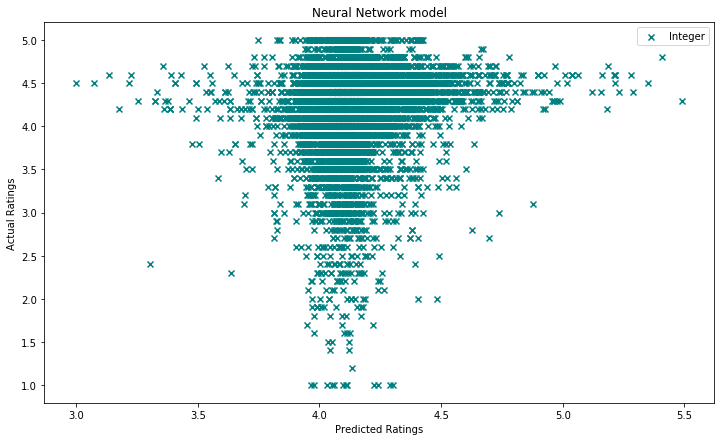

In [247]:
plt.figure(figsize=(12,7))
plt.scatter(prediction.data.numpy(),y_trainNN,color='teal', label = 'Integer', marker = 'x')
plt.legend()
plt.title('Neural Network model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

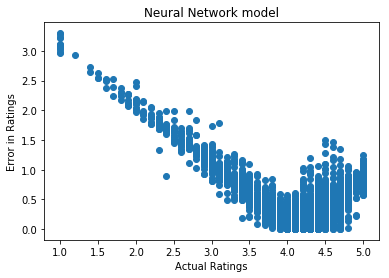

In [248]:
# plt.figure(figsize=(10,5))
plt.scatter(y_trainNN,np.abs(prediction.data.numpy()-y_trainNN))
# plt.legend()
plt.title('Neural Network model')
plt.ylabel('Error in Ratings')
plt.xlabel('Actual Ratings')
plt.show()

In [249]:
# plt.figure(figsize=(10,5))
# plt.plot(y_trainNN,np.abs(prediction.data.numpy()-y_trainNN))
# plt.legend()
# plt.title('Neural Network model')
# plt.ylabel('Error in Ratings')
# plt.xlabel('Actual Ratings')
# plt.show()

In [250]:
xt = Variable(X_testNN, requires_grad=True)
yt = Variable(y_testNN)
xt = xt.float()
yt = yt.float()
y_pred = net(xt)
y_pred =y_pred.data.numpy()

In [251]:
acc=0
for ix in range(y_test.shape[0]) :
     acc = acc + 100*(np.abs(y_test[i]-y_pred[i])/y_test[i])
acc = (acc/y_test.shape[0])
acc = 100 -acc
print(acc)
accnn =acc

[90.95306396]


In [157]:
# PATH ='./mytraining.pt'
# torch.save(net, PATH)

/home/arjun/.local/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
X_test

## Finally , Conclusions

### Linear regression

In [147]:
Evaluationmatrix(ylintest,ylinpred)

Mean Squared Error: 0.2673431154564481
Root Mean Squared Error: 0.5170523333826549
Mean absolute Error: 0.3559645506964455
Mean squared Log Error: 0.013225150564220519


In [148]:
print("Accuracy = "+str(acclin))

Accuracy = 92.31073029028525


### Knn regressor

In [149]:
Evaluationmatrix(yknntest,yknnpred)

Mean Squared Error: 0.26594548907882243
Root Mean Squared Error: 0.5156990295500103
Mean absolute Error: 0.3563532763532764
Mean squared Log Error: 0.013113331778564285


In [150]:
print("Accuracy = "+str(accknn))

Accuracy = 92.31073029028525


### Random Forest Regressor

In [151]:
Evaluationmatrix(yrftest, yrfpred)

Mean Squared Error: 0.22881318850344257
Root Mean Squared Error: 0.4783442155011834
Mean absolute Error: 0.3119321866096866
Mean squared Log Error: 0.01139770818386856


In [152]:
print("Accuracy = "+str(accrf))

Accuracy = 97.3658536585365


### SVM 

In [153]:
Evaluationmatrix(ysvmtest, ysvmpred)

Mean Squared Error: 0.2604653919510498
Root Mean Squared Error: 0.5103581016806237
Mean absolute Error: 0.3466939861641975
Mean squared Log Error: 0.012910897657573066


In [154]:
print("Accuracy = "+str(accsvm))

Accuracy = 97.74561998721879


### Neural networks

In [155]:
Evaluationmatrix(y_test ,y_pred)

Mean Squared Error: 0.30482815201865326
Root Mean Squared Error: 0.5521124450858297
Mean absolute Error: 0.37993444196688825
Mean squared Log Error: 0.014882255476473224


In [156]:
print("Accuracy = "+str(accnn))

Accuracy = [99.22709581]
